In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
path = '/Users/etron/Data Science/Data/'
engage = pd.read_csv(path + 'engagement.csv')
users = pd.read_csv(path + 'users.csv')

In [3]:
print engage.shape
print engage.dtypes
print '\n'
print users.shape
print users.dtypes

(88874, 4)
user_id           int64
browser          object
program          object
hrs_per_week    float64
dtype: object


(88874, 3)
user_id          int64
registration    object
country         object
dtype: object


In [93]:
engage.head()

,user_id,browser,program,hrs_per_week
0,769245,IE,binge,4.91
1,21650570,Safari,binge,3.97
2,91760162,Chrome,drip,3.55
3,90748752,Chrome,drip,5.46
4,66876824,Chrome,binge,3.87


In [94]:
users.head()

,user_id,registration,country
0,90482091,2015-11-01,Germany
1,41529564,2015-11-01,Germany
2,47570654,2015-11-01,Germany
3,96119909,2015-10-31,Germany
4,57248612,2015-10-29,France


In [96]:
merged = engage.join(users, how = 'inner', on='user_id', lsuffix = 'engage', rsuffix = 'user')
merged.shape

### Almost no overlap between records, best to view both data sets individually ###

(76, 8)

In [97]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

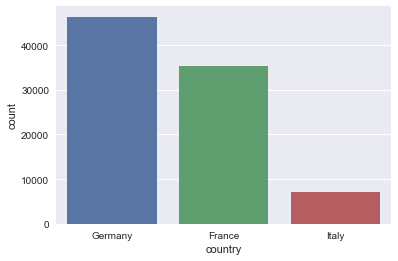

In [100]:
sns.countplot(users['country'])

In [105]:
from datetime import datetime

In [127]:
users['datetime'] = [datetime.strptime(d, '%Y-%m-%d') for d in users['registration']]
#users['datetime'] = [date.replace(day = 1, hour=0, minute=0, second=0, microsecond=0) for date in dates]

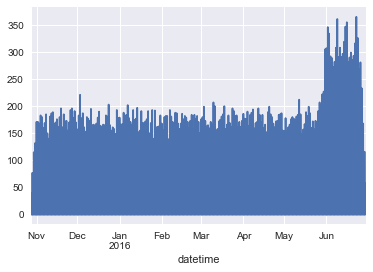

In [134]:
users[users['country']=='Germany'].set_index('datetime').resample('H').country.count().plot()

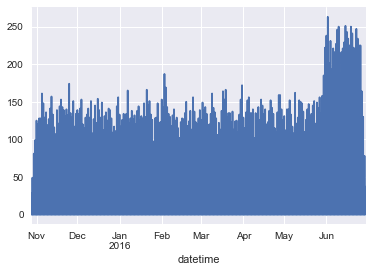

In [135]:
users[users['country']=='France'].set_index('datetime').resample('H').country.count().plot()

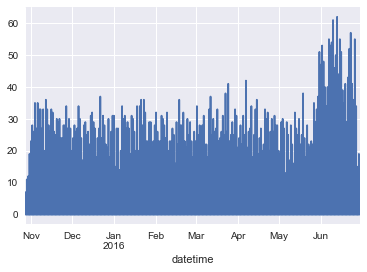

In [136]:
users[users['country']=='Italy'].set_index('datetime').resample('H').country.count().plot()

In [148]:
engage.groupby('program').agg({'hrs_per_week': ['mean','std','count']})

hrs_per_week                 
                mean       std  count
program                              
binge       4.605888  2.763833  44371
drip        4.597865  2.271243  44503

In [147]:
engage.groupby(['browser','program']).agg({'hrs_per_week': ['mean','std','count']})

hrs_per_week                 
                        mean       std  count
browser program                              
Chrome  binge       4.605778  2.753533  19096
        drip        4.688049  2.209794  19530
Firefox binge       4.618509  2.792541   9739
        drip        4.712877  2.207023   9564
IE      binge       4.590142  2.781408   9750
        drip        4.689867  2.172872   9710
Opera   binge       4.558943  2.802068    984
        drip        0.000000  0.000000    896
Safari  binge       4.622324  2.702701   4802
        drip        4.673870  2.161914   4803

In [149]:
engage[engage['browser']!='Opera'].groupby('program').agg({'hrs_per_week': ['mean','std','count']})

hrs_per_week                 
                mean       std  count
program                              
binge       4.606953  2.762983  43387
drip        4.692338  2.195730  43607